# SOK-1006 v24

## Analyse av en merverdiavgift ("ad valorem tax")
### Løsningsforslag

En særavgift er en avgift som betales ved produksjon og omsetning av noen typer varer. Det kan også gjelde tollbelagte varer som innføres fra utlandet. [Her](https://www.regjeringen.no/no/tema/okonomi-og-budsjett/skatter-og-avgifter/avgiftssatser-2024/id2997383/) finnes ei liste med avgiftssatser for 2024, hvor vi ser
at de fleste avgifter er ilagt per enhet (stykk, kilo, liter, kWh, sete osv). Noen særavifter er beregnet som en prosentsats, som for eksempel dokumentavgiften som må betales av en boligkjøper, og som utgjør 2,5% av salgsverdien. Merverdiavgift ilegges som en prosentsats av omsetningsverdien. Den vanlige satsen i Norge er 25%, mens næringsmidler (mat og drikke) får mva 15%, og bl.a. persontransport, kinobilletter og hotellovernattinger har en sats på 12%.          

Her skal vi se på en merverdiavgift som illegges hotellovernattinger. Ifølge tabell 12892 og tabell 12897 (SSB) var det ca 187 000 hotellovernattinger i Troms og Finnmark i juli 2023 til en gjennomsnittspris på ca 1000kr. Tenk at etterspørsel og tilbud er lineære og gitt ved


\begin{equation}
   x^{D}= a - b p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -A + B p_s\tag{2}
\end{equation}

hvor a, b, A, B er alle positive tall. Kjøpere (hotellgjester) betaler $p_k$ pr rom og hotellene (selgere) får $p_s$. Prisen som selgere får er det som konsumenter betaler minus merverdiavgift mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -A + B p_k(1-t)\tag{3}
\end{equation}



Det første vi vil gjøre er å prøve å "kalibrere" modellen, dvs finne verdier på a, b, A, B som gir oss en likevektsløsning med p = 1000 og x = 187000, gitt at t=0.12 (mva sats for hotellovernattinger).

In [51]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [52]:
# Definer variabler og parametre
x, p, a, b, A, B, t = sp.symbols('x p a b A B t')

# faktiske verdier
x_value = 187000  
p_value = 1000    
t_value = 0.12    

# likninger for etterspørsel og tilbud
eq_d = sp.Eq(x, a - b * p)
eq_s = sp.Eq(x, -A + B * p * (1 - t))

# sett inn verdiene for a,p,t
eq_d_sub = eq_d.subs({x: x_value, p: p_value})
eq_s_sub = eq_s.subs({x: x_value, p: p_value, t: t_value})

# løs likningssystem
sol = sp.solve((eq_d_sub, eq_s_sub), (a, b, A, B))

sol


{A: 880.0*B - 187000.0, a: 1000.0*b + 187000.0}

Da får vi to likninger: $A=-880B-187000, a=1000b+187000$. Vi har ikke mer informasjon enn dette, så må velge parametre som oppfyller disse kravene (hadde vi hatt en priselastisitet kunne vi også ha brukt dette).        

Jeg velger a=287000, b=100, A=33000, B=250. Vi deler disse parametre på 1000 slik at vi måler antall overnattinger i tusen.

In [53]:
# Etterspørsel i likning (1)

def x_d(p):
    return 287 - 0.1*p

#Tilbud i likning (3)

def x_s(p,t):
    return -33+0.25*p*(1-t)


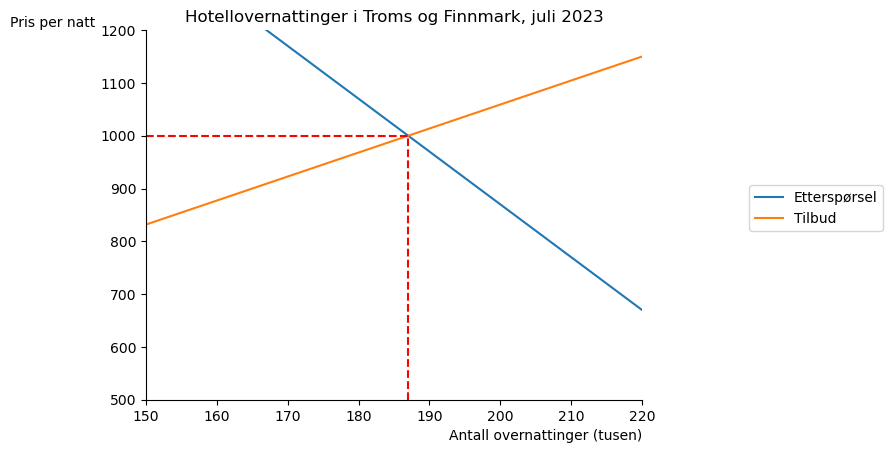

In [54]:
# vi lager en figur

p_num=np.linspace(0.1,1500,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per natt', loc='top', rotation = 0)
                ax.set_xlabel('Antall overnattinger (tusen)', loc='right')
                ax.set(xlim=(150,220))
                ax.set(ylim=(500,1200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0.12),p_num, label='Tilbud')

ax.hlines(1000, 150, 187, 'r', linestyles='dashed')
ax.vlines(187, 500, 1000, 'r', linestyles = 'dashed')

ax.set_title('Hotellovernattinger i Troms og Finnmark, juli 2023')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon uten mva (t=0), og forklar hvorfor tilbudsfunksjonen med mva har brattere helning.
2. Beregn likevektspris og -kvantum uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten fra mva, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?
5. (For de ambisiøse). La mva være et tall t mellom 0 og 1. (i) Regn ut hvordan likevektsverdiene på x og p avhenger av t. (ii) Hva er den maksimale verdien på t?. (iii) Finn et uttrykk for myndighetenes proveny som en funksjon av t. (iv) Tegn en figur som viser proveny på den vertikale aksen og t på den horisontale. (v) Finn verdien på t som maksimerer proveny, og vis dette i figuren.

In [55]:
# skriv ditt svar her

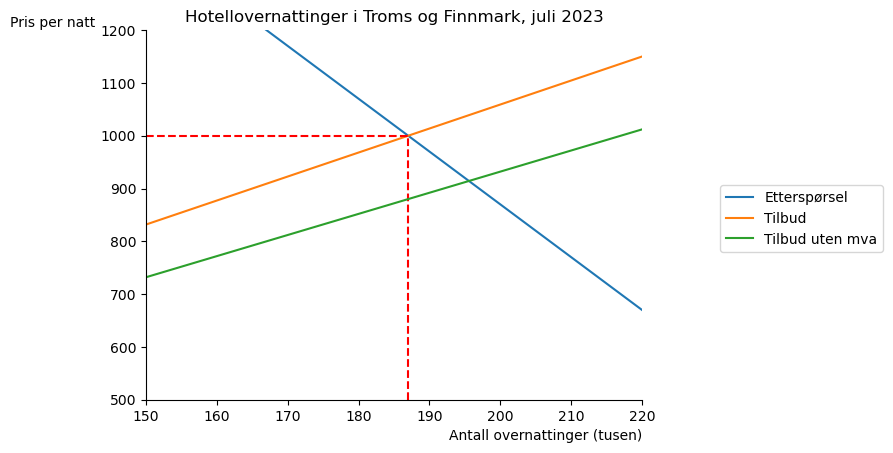

In [56]:
# 1. vi tegner tilbudskurven før mva

ax.plot(x_s(p_num, 0),p_num, label='Tilbud uten mva')

ax.legend(bbox_to_anchor=(1.5,0.6))

fig

In [57]:
# 2.
# likninger for etterspørsel og tilbud uten mva
eq_d_umva = sp.Eq(x, 287 - 0.1 * p)
eq_s_umva = sp.Eq(x, -33 + 0.25 * p)



# løs likningssystem
sol_umva = sp.solve((eq_d_umva, eq_s_umva), (p,x))

sol_umva

{p: 914.285714285714, x: 195.571428571429}

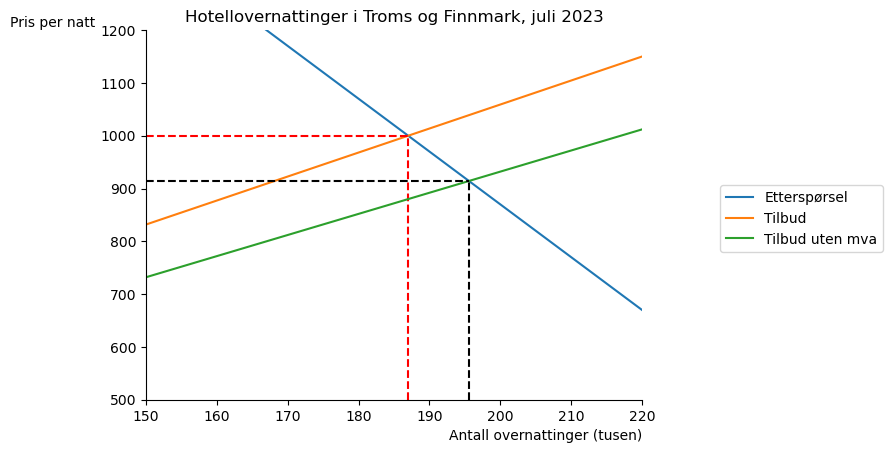

In [58]:
# tegne løsningen i figuren

ax.plot ([150,sol_umva[x]], [sol_umva[p], sol_umva[p]], linestyle='dashed', color='black')
ax.plot ([sol_umva[x], sol_umva[x]], [500, sol_umva[p]], linestyle='dashed', color='black')

ax.legend(bbox_to_anchor=(1.5,0.6))

fig

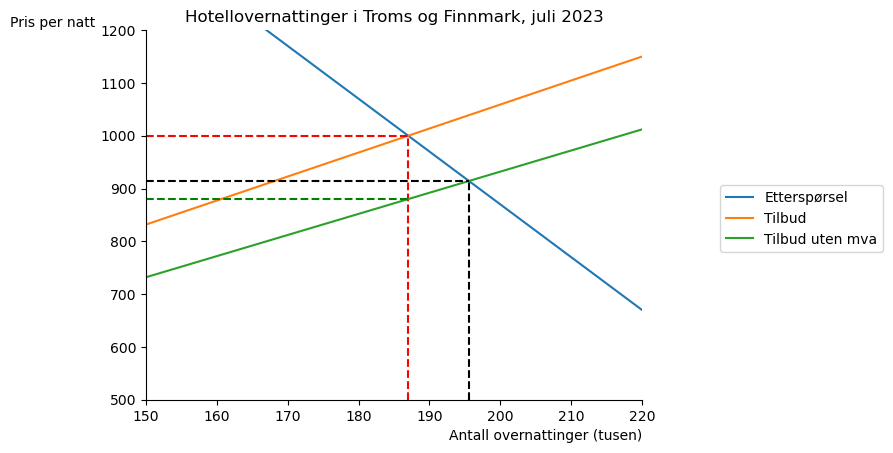

In [59]:
# 3. Vi vet at hotellgjester (konsumenter) betaler en pris p_k=1000
# prisen som hotellet får blir p_s=(1-t)p_k=0.88p_k=880
# tegn i figuren

ax.hlines(880, 150, 187, 'g', linestyles='dashed')

ax.legend(bbox_to_anchor=(1.5,0.6))

fig


Her har vi et område avgrenset av den grønne og røde horisontale striplet linje, samt prisaksen og den røde vertikale linjen som angir inntekten til staten i avgiftproveny. Dette er lett å beregne som et areal: (1000-880)\*187 000 = 22.44 mill NOK. Den sorte horisontale linjen viser prisen som gjester måtte betale og hoteller ville fått uten mva. Vi har beregnet dette til 914.49 kr. Innføringen av 12% mva på hotellovernatting koster gjester en ekstra 1000-914.49 = 85.51 kr per natt mens hotellene får 914.49-880 = 34.49 kr mindre per natt. Av de 22.44 mill kr som betales i avgiftproveny, betaler gjester 85.51\*187 000 = 15 990 370 kr, eller 71.26% mens hotellene betaler resten. Vi kan tegne inn disse områdene i figuren.

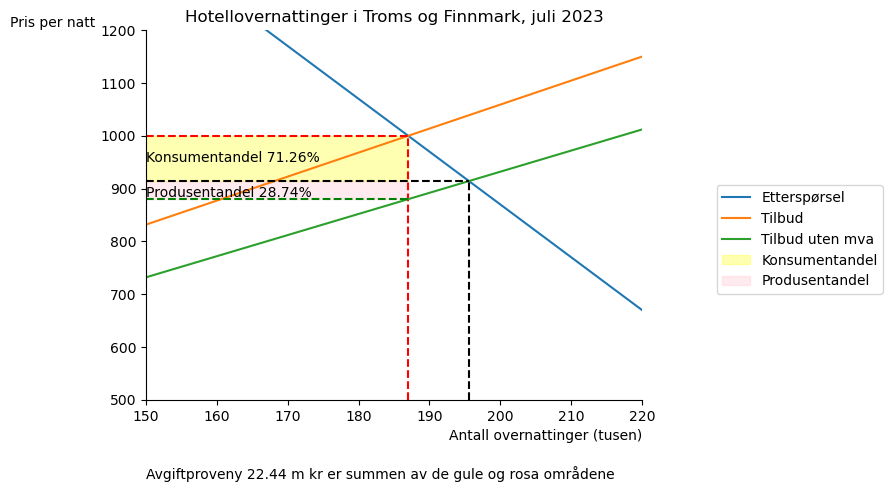

In [60]:
q= np.linspace(150, 187, 100)

ax.fill_between(q, float(sol_umva[p]), 1000, color = "yellow",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q, 880, float(sol_umva[p]), color = "pink",alpha = 0.3,label='Produsentandel')

ax.text(150, 950, f"Konsumentandel 71.26%")
ax.text(150, 885, f"Produsentandel 28.74%")

ax.text(150, 350, f"Avgiftproveny 22.44 m kr er summen av de gule og rosa områdene")

ax.legend(bbox_to_anchor=(1.5,0.6))
fig


4. Vi diskuterte dette i forelesningen.        
Noen momenter (blant mange):       
- For å ilegge en stykkavgift må man definere hva "én enhet" er, mens mva går på verdi som er muligens enkelere å definere. På den andre siden beregnes mva på merverdien skapt i verdikjeden, og dette kan være komplisert å beregne.
- Mva kan være mindre forutsigbart for de som samler inn provenyet ettersom verdi er avhengig av både pris og kvantum, mens det å beregne provenyet fra en stykkprisavgift krever info kun om forventet omsetning.
- Man betaler mer i kroner jo høyere forbruket er med mva, og da kan det brukes til å oppmuntre konsumenter til å spare.
- Inflasjon gjør at priser økes, og en mva tar hensyn til dette slik at den reelle verdien av provenyet er uendret. Dette skjer ikke automatisk med en stykkprisavgift (med mindre den er indeksregulert, og øker i takt med endringer i KPI). Stykkprisavgifter endres i Nasjonalbudsjettet.

In [61]:
# 5. Proveny
# likninger for etterspørsel og tilbud med mva t
eq_d_t = sp.Eq(x, 287 - 0.1 * p)
eq_s_t = sp.Eq(x, -33 + 0.25 * p*(1-t))



# løs likningssystem
sol_px_t = sp.solve((eq_d_t, eq_s_t), (p,x))

sol_px_t

{p: -6400.0/(5.0*t - 7.0), x: (1435.0*t - 1369.0)/(5.0*t - 7.0)}

In [62]:
# legg merke til at det er en maksimal t
# x = /1369-1435t)/(7-5t) må være > 0
# dvs t < t_max hvor
t_max = sp.solve(sol_px_t[x],t)
t_max

[0.954006968641115]

In [63]:
# Inntekt fra proveny er R (målt i 1000 kr)

R = sol_px_t[p]*t*sol_px_t[x]
R

-6400.0*t*0.0204081632653061/(0.714285714285714*t - 1)**2*(1435.0*t - 1369.0)

In [64]:
# finne t som maks R
t_opt = sp.solve(sp.diff(R, t),t)
t_opt

[-807314285714285., 0.723518308795773]

In [65]:
# pass på at dette er et maksimum
# deriver R 2 ganger mhp t
d_2_d_t = sp.simplify(sp.diff(R,t,2))

# pass på at dette er negativ for t_opt[1]
d_2_d_t.subs(t, t_opt[1])

-2190553.08681303

In [66]:
# gjør om til funksjon for tegning
R_fn=sp.lambdify(
    (t), 
    R
)

R_fn(t)

-130.612244897959*t*(1435.0*t - 1369.0)/(0.714285714285714*t - 1)**2

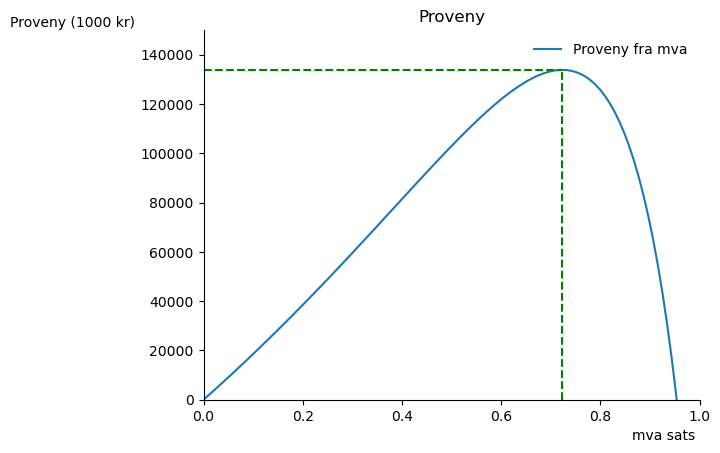

In [67]:
# lag t fra 0 til t_max

t_num = np.linspace(0,t_max,100)

fig,ax=plt.subplots()

ax.set_ylabel('Proveny (1000 kr)', loc = 'top', rotation = 0)
ax.set_xlabel('mva sats ', loc= 'right')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.plot(t_num, R_fn(t_num),label='Proveny fra mva')



#legend:
ax.legend(loc='best', frameon=False)

#title
ax.set_title ('Proveny')

ax.set_xlim(0,1)
ax.set_ylim(0,150000)

# sett på linjer til og fra maks

ax.vlines(t_opt[1], 0, R_fn(t_opt[1]), 'g', linestyles='dashed')
ax.hlines(R_fn(t_opt[1]), 0, t_opt[1], 'g', linestyles ='dashed');

For å maksimere proveny fra dette markedet ville myndighetene sette en mva på 72.35%! Vi kan regne på antall overnatting på hotell:

In [68]:
sol_px_t[x].subs(t, t_opt[1])*1000

97785.7142857141

Litt over 97785 overnattinger sammenlignet med 187000 med 12% mva.